# Detecting SPAM emails with a Naive Bayes Classifier

- **By:** Adrian Mateos Garza
- **Email:** [adrianmateosg11@gmail.com](mailto:adrianmateosg11@gmail.com)
- **Github:** [github](https://github.com/AdrianMateosG)
- **Date created**: 17/August/2024

## Setup

In [21]:
# Libraries
import pandas as pd
import numpy as np
import re

We'll use a spam collection dataset that can be downloaded from: [kaggle](https://www.kaggle.com/uciml/sms-spam-collection-dataset)

In [22]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Preparing the data

In [23]:
data_clean = data
# Create binary value 1 if 'spam', 0 if 'ham'
data_clean['spam'] = data_clean['v1'].map({'ham' : 0, 'spam' : 1})

# Drop unnecessary columns
data_clean = data_clean.drop(columns=['v1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Renaming email column for clarity
data_clean = data_clean.rename(columns={'v2' : 'email'})
data_clean.head()

,email,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


### Text Preprocessing
Steps
1. Converting words to lower case.
2. Removing special characters.
3. Removing stopwords.
4. Stemming.

#### Lower case and special characters

In [24]:
data_clean['email'] = data_clean['email'].apply(lambda x : x.lower())
data_clean.head()

,email,spam
0,"go until jurong point, crazy.. available only ...",0
1,ok lar... joking wif u oni...,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor... u c already then say...,0
4,"nah i don't think he goes to usf, he lives aro...",0


#### Removing special characters

In [25]:
data_clean['email'] = data_clean['email'].apply(lambda x : re.sub('[^a-z0-9 ]+', ' ', x))
data_clean.head()

,email,spam
0,go until jurong point crazy available only i...,0
1,ok lar joking wif u oni,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor u c already then say,0
4,nah i don t think he goes to usf he lives aro...,0


We have assumed that it is "safe" to turn all letters of the emails into lower case and that special characters do not posses relevant information; this is okay for this application in particular, but for, say, sentiment analysis, this would need to be reconsidered since messages in all caps or special characters like exclamation points are often used to convey emotions.

#### Removing Stop words

Stop words are words that are encountered very frequently in a given language but do not carry useful information, thus it is a good practice to remove them.

In [26]:
import nltk
from nltk.corpus import stopwords

# Stop words of the English language
nltk.download('stopwords');
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adrianmateos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Removing stop words...

In [27]:
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/adrianmateos/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
def remove_stop_words(message):

    words = word_tokenize(message)
    words = [word for word in words if word not in stop_words]

    return words

In [29]:
data_clean['email'] = data_clean['email'].apply(remove_stop_words)
data_clean

,email,spam
0,"[go, jurong, point, crazy, available, bugis, n...",0
1,"[ok, lar, joking, wif, u, oni]",0
2,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",1
3,"[u, dun, say, early, hor, u, c, already, say]",0
4,"[nah, think, goes, usf, lives, around, though]",0
...,...,...
5567,"[2nd, time, tried, 2, contact, u, u, 750, poun...",1
5568,"[b, going, esplanade, fr, home]",0
5569,"[pity, mood, suggestions]",0
5570,"[guy, bitching, acted, like, interested, buyin...",0


Apart from removing stop words we **tokenized** each message. Tokenization is defined as splitting a text into small units known as **tokens**. However it is not as simple as taking a text and splitting it each time we find a space between words. The function `word_tokenize` also does things like this:

In [33]:
word_tokenize("There's something I'd like to know, bro.")

['There', "'s", 'something', 'I', "'d", 'like', 'to', 'know', ',', 'bro', '.']

#### Stemming & lemmatization

In natural language processing, words often appear in various forms due to inflections (e.g., "run," "ran," "running") or derivationally related variations (e.g., "democracy," "democratic," "democratization"). To address this, techniques such as **stemming** or **lemmatization** are employed to standardize these variations into a common base form, enabling more consistent text analysis.

- Stemming: Applies heuristic rules to remove common prefixes or suffixes to reduce words to their base forms (e.g., car, cars $\rightarrow$ car).

- Lemmatization: Maps different grammatical forms of a word to its root form, considering the word’s grammatical context (e.g., am, are, is $\rightarrow$ be).

In short, stemming is a simpler process that chops off parts of a word by taking into account common prefixes and suffixes. While, lemmatization takes into consideration the grammar of the word and attemps to find the root word.

In [17]:
## Modules for Stemming and Lemmatization
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')

Porter = PorterStemmer()
Lemma = WordNetLemmatizer()

# Stem the words car & cars
print(Porter.stem("car"))
print(Porter.stem("cars"))

# Lemmatize words am, are, is
print(Lemma.lemmatize("am", wordnet.VERB))
print(Lemma.lemmatize("are", wordnet.VERB))
print(Lemma.lemmatize("is", wordnet.VERB))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adrianmateos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


car
car
be
be
be


For the sake of simplicity we will stick to *stemming* in this application.

In [18]:
data_clean['email'] = data_clean['email'].apply(lambda x : [Porter.stem(word) for word in x])
data_clean

,email,spam
0,"[go, jurong, point, crazi, avail, bugi, n, gre...",0
1,"[ok, lar, joke, wif, u, oni]",0
2,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",1
3,"[u, dun, say, earli, hor, u, c, alreadi, say]",0
4,"[nah, think, goe, usf, live, around, though]",0
...,...,...
5567,"[2nd, time, tri, 2, contact, u, u, 750, pound,...",1
5568,"[b, go, esplanad, fr, home]",0
5569,"[piti, mood, suggest]",0
5570,"[guy, bitch, act, like, interest, buy, someth,...",0


## Train/Test split

In [32]:
train_set = data_clean.sample(frac=0.8, random_state = 1957) # seed for reproducibility
test_set = data_clean.drop(train_set.index)
print(train_set.shape)
print(test_set.shape)

(4458, 2)
(1114, 2)


## Bayes' Theorem

We know that the probability of an event A given another event B is written as:

$$
P(A|B)=\frac{P(A\cap B)}{P(B)}
$$.

Also, when events A and B are independent, we have that $P(A|B) = P(A)$

On the other hand, the probability that B occurs given that A happened is:

$$
P(B|A)=\frac{P(A\cap B)}{P(A)}.
$$

Then, we have that $P(A|B)P(B)=P(B|A)P(A)=P(A\cap B)$. Therefore,

$$
P(A|B)=\frac{P(B|A)P(A)}{P(B)}\quad \text{also:} \quad P(B|A)=\frac{P(A|B)P(B)}{P(A)}
$$

Which is **Bayes' Theorem**.

In the first equation, the term $P(A|B)$ is the **posterior probability**, the term $P(A)$ is defined as the **prior probability**, while $P(B)$ is the **marginal probability***, and $P(B|A)$ is a conditional probability that can be understood as the likelihood of A given a fixed B: $L(A|B)=P(B|A)$.

## Naive Bayes Classifier

Now, let $W$ be the set of all English words and let an email $m$ be a set of words that belong to $W$: $m=\{w_1,w_2,\dots,w_n\}$. If we want to know what is the probability that said email $m$ is spam we can use Bayes' Theorem in the following way:

$$
P(spam|m) = \frac{P(m|spam)P(spam)}{P(m)}
$$

$$
\Rightarrow \frac{P(w_1\cap w_2\cap\cdots\cap w_n|spam)P(spam)}{P(w_1\cap w_2\cap\cdots\cap w_n)}
$$

$$
\Rightarrow \frac{P(w_1\cap w_2\cap\cdots\cap w_n|spam)P(spam)}{P(w_1\cap w_2\cap\cdots\cap w_n|spam)P(spam)+P(w_1\cap w_2\cap\cdots\cap w_n|not~spam)P(not~spam)}
$$

Lets focus on the numerator of the last expression. We have $P(w_1\cap w_2\cap\cdots\cap w_n|spam)P(spam)$, which is equivalent to the joint probability distribution of $P(w_1\cap w_2\cap\cdots\cap w_n\cap spam)$. By the multiplication rule, this expression can be rewritten as:

$$
P(w_1\cap w_2\cap\cdots\cap w_n\cap spam) = P(spam)P(w_1|spam)P(w_2|w_1\cap spam)\cdots P(w_n|\cap_{i=1}^{n-1}w_i\cap spam).
$$

Which leads us to our "naive assumption": given the spam category, we assume that all the words of the email, are **mutually and conditionally independent** on the spam category:

$$
P(w_i|w_{1}\cap\cdots\cap w_{i-1}\cap spam) = P(w_i|spam).
$$

Which means that the probability of having word $w_i$ in a spam message is not affected by the presence of the set of words $\{w_{1},\dots,w_{i-1}\}$ in said message, what we just need to consider is that such email is spam. Let's consider the sentence "we need your info" and assume that we know we are dealing with an email that is spam. Then, if our naive assumption were true, this would be the case:

$$
P(\text{need}|\text{we}\cap\text{your}\cap\text{info}\cap spam) = P(\text{need}|spam).
$$

However, this is not usually true, what we have, in general, is the opposite:

$$
P(\text{need}|\text{we}\cap\text{your}\cap\text{info}\cap spam) \neq P(\text{need}|spam).
$$

For this reason we say that this assumption is naive. Nevertheless, this classifier works very well in many situations.

Let us go back to the numerator. Taking into account our naive premise, the joint probability distribution can be expressed as

$$
P(w_1\cap w_2\cap\cdots\cap w_n\cap spam) = P(spam)P(w_1|spam)P(w_2|spam)\cdots P(w_n|spam).
$$

Therefore, the probability that a given message $m=\{w_1,w_2,\dots,w_n\}$ is spam can be computed with this expression:

$$
P(spam|w_1\cap w_2\cap\cdots\cap w_n) = \frac{P(w_1|spam)P(w_2|spam)\cdots P(w_n|spam)P(spam)}{P(w_1\cap w_2\cap\cdots\cap w_n)}.
$$

To classify an email as spam with all this we'll use a **Maximum A Posteriori Model (MAP)** in which:

An email is categorized as spam if:

$$
P(spam|w_1\cap w_2\cap\cdots\cap w_n) > P(not~spam|w_1\cap w_2\cap\cdots\cap w_n),
$$

which is equivalent to

$$
P(w_1|spam)P(w_2|spam)\cdots P(w_n|spam)P(spam) > P(w_1|not~spam)P(w_2|not~spam)\cdots P(w_n|not~spam)P(not~spam).
$$

## Training the Model

Let $W_t$ be the set that contains all the words of the emails that belong to the training set. And $W_{ts}$ be the training set emails that belong to the spam category and $W_{t\~s}$ the training set emails that dont belong to the spam category. Then we have: $W_t = W_{ts} \cup W_{t\~s}$ and $W_{ts} \cap W_{t\~s} = \emptyset$. In the training phase we need to compute the following probabilities for the training set:

$$
P(w_i|spam), ~\forall w_i\in W_{ts}
$$
$$
P(w_i|not~spam), ~\forall w_i\in W_{t\~s}
$$

Where

$$
P(w_i|spam)=\frac{\text{\# of ocurrences of $w_i$ in spam emails}}{\text{\# of words in all spam emails}}
$$

$$
P(w_i|not~spam)=\frac{\text{\# of ocurrences of $w_i$ in non-spam emails}}{\text{\# of words in all non-spam emails}}
$$

Also, to calculate $P(spam)$ and $P(not~spam)$ we have:

$$
P(spam) = \frac{|W_{ts}|}{|W_t}
$$

$$
P(not~spam) = \frac{|W_{t\~s}|}{|W_t|}
$$

This way of computing the probabilities is based on the **Bag of Words** model, in which we are interested in the frequencies of each of the words of a corpus without taking into consideration neither grammar nor order.

##### Probability of spam

In [49]:
p_spam = train_set[train_set['spam'] == 1].shape[0] / train_set.shape[0]
p_spam

0.13301929116195604

##### Probability of not spam

In [48]:
p_not_spam = train_set[train_set['spam'] == 0].shape[0] / train_set.shape[0]
p_not_spam

0.866980708838044

### Necessary functions

In [50]:
def bag_of_words(corpus):

    """Create a dictionary of word frequencies from a set of processed emails.

    Processes a corpus (collection of emails) and builds a dictionary where each key
    is a unique word and each value is the corresponding number of ocurrences in the corpus.

    Args:
        corpus (list): A list of documents (emails), where each document is a list of preprocessed words.

    Returns:
        dict: A dictionary mapping words to their frequency counts, where:
            - keys (str): Unique words from the corpus
            - values (int): Number of occurrences of each word

    Example:
        >>> emails = [['hello', 'world'], ['hello', 'there']]
        >>> bag_of_words(emails)
        {'hello': 2, 'world': 1, 'there': 1}
    """
    bag_of_words = {}

    for list in corpus:
        for item in list:
            if item in bag_of_words:
                bag_of_words[item] += 1
            else:
                bag_of_words[item] = 1

    return bag_of_words

In [51]:
def probability_words(df):

    """Calculate the probability distribution of words in a set of emails.

    Computes the probability of each unique word occurring in the dataset by creating
    a bag of words and normalizing the frequency counts. This is used to build the 
    conditional probability distributions P(word|spam) and P(word|not_spam) for the
    Naive Bayes classifier.

    Args:
        df (pandas.DataFrame): A DataFrame containing preprocessed emails with at least
            one column named 'email' where each row contains a list of preprocessed words.

    Returns:
        dict: A dictionary mapping words to their probabilities, where:
    
            - keys (str): Unique words from the dataset
            - values (float): Probability of each word occurring, calculated as:
            (word frequency) / (total words)

    Example:
        >>> df = pd.DataFrame({
                'email': [['hello', 'world'], ['hello', 'there']]
                })
        
        >>> probability_words(df)
        {'hello': 0.5, 'world': 0.25, 'there': 0.25}
    """

    word_counts = bag_of_words(df["email"])

    total = sum(word_counts.values())

    # Divide total by each of the values
    probabilities = {k: v/total for k, v in word_counts.items()}

    return probabilities

In [37]:
# Proabilities for each of the words in spam emails from the training set
probability_spam_words = probability_words(train_set[train_set['spam'] == 1])
probability_spam_words

{'urgent': 0.004474068663257853,
 'mobile': 0.009587289992695399,
 'number': 0.002282688093498904,
 'awarded': 0.0028305332359386415,
 '2000': 0.0017348429510591673,
 'prize': 0.006756756756756757,
 'guaranteed': 0.0034696859021183346,
 'call': 0.025931336742147554,
 '09058094454': 9.130752373995617e-05,
 'land': 0.0013696128560993425,
 'line': 0.002739225712198685,
 'claim': 0.008035062089116142,
 '3030': 0.0004565376186997809,
 'valid': 0.0018261504747991235,
 '12hrs': 0.0012783053323593865,
 '1': 0.008217677136596055,
 'nokia': 0.004930606281957633,
 'tone': 0.003834915997078159,
 '4': 0.010865595325054784,
 'ur': 0.009861212563915266,
 'mob': 0.0013696128560993425,
 'every': 0.002100073046018992,
 'week': 0.003743608473338203,
 'txt': 0.012600438276113951,
 'nok': 9.130752373995617e-05,
 '87021': 0.00018261504747991235,
 '1st': 0.0017348429510591673,
 'free': 0.016800584368151936,
 'get': 0.006391526661796932,
 'txtin': 9.130752373995617e-05,
 'tell': 0.0007304601899196494,
 'frien

In [41]:
# Proabilities for each of the words in non-spam emails from the training set
probability_non_spam_words = probability_words(train_set[train_set['spam'] == 0])
probability_non_spam_words

{'wat': 0.002712794816966138,
 'yup': 0.001021287460504899,
 'ok': 0.007500079788082852,
 'thanx': 0.0008297960616602305,
 'please': 0.0018829987553059075,
 'attend': 6.383046628155619e-05,
 'phone': 0.0019787444547282418,
 'watching': 0.001021287460504899,
 'tv': 0.0006383046628155619,
 'lor': 0.004276641240864265,
 'nice': 0.0016276768901796828,
 'one': 0.004117065075160374,
 'like': 0.005872402897903169,
 'gettin': 0.00022340663198544666,
 'bit': 0.001021287460504899,
 'arty': 3.1915233140778095e-05,
 'collages': 3.1915233140778095e-05,
 'mo': 0.00022340663198544666,
 'well': 0.002968116682092363,
 'tryin': 3.1915233140778095e-05,
 '2': 0.00855328248172853,
 'ne': 9.574569942233428e-05,
 'way': 0.002872370982670028,
 'got': 0.006319216161874063,
 'roast': 9.574569942233428e-05,
 'min': 0.0005425589633932276,
 'lovely': 0.00028723709826700285,
 'shall': 0.0008617112948010085,
 'enjoy': 0.0008297960616602305,
 'u': 0.02581942361088948,
 'made': 0.0007659655953786743,
 'appointment': 0

In [82]:
def classify_email(email):

    """Classify an email as spam or not spam using Naive Bayes classification.

    Implements a binary classifier that uses previously computed word probabilities
    to determine if an email is spam. it applies the Naive Bayes algorithm using 
    pre-computed probabilities: P(spam|words) vs P(not_spam|words).

    Args:
        email (list): A list of preprocessed words from a single email message.

    Returns:
        int: Classification result where:
            - 1: Email is classified as spam
            - 0: Email is classified as not spam

    Notes:
        - Uses global variables p_spam, p_not_spam, probability_spam_words,
          and probability_non_spam_words that must be pre-computed
        - Applies Laplace smoothing (1e-11) for unseen words
        - Uses multiplication of probabilities in log space to avoid underflow

    Example:
        >>> email_words = ['free', 'winner', 'cash', 'prize']
        >>> classify_email(email_words)
        1  # Classified as spam
    """

    prob_non = p_not_spam
    prob_spam = p_spam
    
    for word in email:
      if word in probability_spam_words:
        prob_spam *= probability_spam_words[word]
      else:
        prob_spam *= 0.00000000001 # Arbitrary very small number
      if word in probability_non_spam_words:
        prob_non *= probability_non_spam_words[word]
      else:
        prob_non *= 0.00000000001
    
    if prob_spam > prob_non:
      return 1
    else:
      return 0

In [83]:
test_set_hat = test_set.copy()
test_set_hat['prediction'] = test_set['email'].apply(classify_email)
test_set_hat

,email,spam,prediction
10,"[gon, na, home, soon, want, talk, stuff, anymo...",0,0
12,"[urgent, 1, week, free, membership, 100, 000, ...",1,1
29,"[ahhh, work, vaguely, remember, feel, like, lol]",0,0
30,"[wait, still, clear, sure, sarcastic, x, want,...",0,0
34,"[thanks, subscription, ringtone, uk, mobile, c...",1,1
...,...,...,...
5554,"[well, keep, mind, got, enough, gas, one, roun...",0,0
5555,"[yeh, indians, nice, tho, kane, bit, shud, go,...",0,0
5568,"[b, going, esplanade, fr, home]",0,0
5569,"[pity, mood, suggestions]",0,0


## Evaluating the model

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, ConfusionMatrixDisplay

In [85]:
true_labels = test_set_hat['spam']
predicted_labels = test_set_hat['prediction']
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, pos_label = 1)
recall = recall_score(true_labels, predicted_labels, pos_label = 1)
f1 = f1_score(true_labels, predicted_labels, pos_label = 1)
roc = roc_auc_score(true_labels, predicted_labels)
confusion = confusion_matrix(true_labels, predicted_labels)
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc]
})

metrics_df

,Metric,Score
0,Accuracy,0.983842
1,Precision,0.965753
2,Recall,0.915584
3,F1 Score,0.940000
4,ROC AUC,0.955188


**Accuracy (98.38%):** Percentage of all correct predictions. Very good - model correctly classifies $\sim 98$ of every $100$ emails.

**Precision (96.58%):** When model predicts "spam", it's right $96.58\%$ of the time. Strong - very few legitimate emails marked as spam.

**Recall (91.56%):** Catches $91.56\%$ of actual spam emails. Good - most spam is being caught, though some still slips through.

**F1 Score (94.00%):** Balanced measure between precision and recall. Strong score indicating good overall performance.

**ROC AUC (95.52%):** Model's ability to distinguish between classes. Excellent - shows strong separation between spam and non-spam.

These are impressive metrics, particularly the high precision (few false positives) which is crucial for spam detection - since we wouldn't want to block legitimate emails.

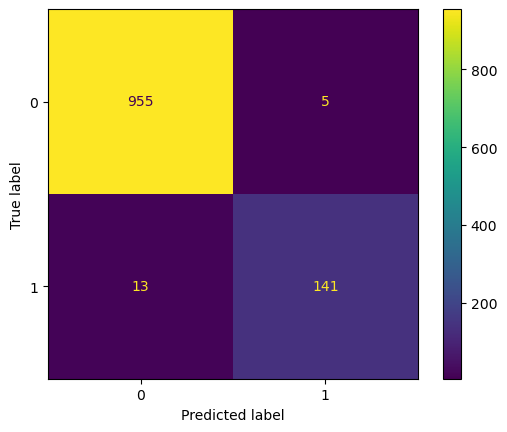

In [81]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion);
disp.plot(cmap = "viridis");

## Generating new messages

We can use the conditional distributions that we learned in the training phase to generate either spam or not spam messages. For creating an spam email we can employ this distribution:

$$
P(w|\text{spam})
$$

Notice that said distribution is stored in `probability_spam_words`.

In the next cell, use the `np.random.choice` function and the `join` method for creating an spam message.

In [89]:
# Generate a spam email with a length of 20 words
' '.join(np.random.choice(list(probability_spam_words.keys()), 20, p = list(probability_spam_words.values())))

'ac 2 guaranteed apply week ending points 40gb sextextuk book 08 09058094583 free indicate 6zf urawinner busty 9yt potter 150ppm'

In [90]:
# Generate a non spam email composed of 20 random words
' '.join(np.random.choice(list(probability_non_spam_words.keys()), 20, p=list(probability_non_spam_words.values())))

'bed send u back replace lt meaning sir much oh thought great later good lock u taking dad heard calling'

These messages shouldn't make much sense since the we followed a "naive" approach and stemmed words. Nevertheless, what we get gives us a rough idea of the type of words one would find in these two types of emails.